In [1]:
%matplotlib inline

In [2]:
import sys
sys.path.insert(0,'..')
import pickle

import visualize
import datasets
import ldle
# Uncomment to reload a library
from importlib import reload 
visualize = reload(visualize)
ldle = reload(ldle)
datasets = reload(datasets)

matplotlib.get_backend() =  module://ipykernel.pylab.backend_inline
matplotlib.get_backend() =  module://ipykernel.pylab.backend_inline


In [3]:
save_dir_root = '../data/ldle1/barbell/'

In [4]:
X, labelsMat, ddX = datasets.Datasets().barbell()

X.shape =  (10227, 2)


# LDLE

In [5]:
ldle_obj = ldle.LDLE(X=X, eta_min=10, max_iter0=20, 
                     vis = visualize.Visualize(save_dir_root),
                     vis_y_options = {'cmap0':'summer', # for the interior
                                      'cmap1':'jet', # for the tear
                                      'labels':labelsMat[:,0]})

Using LDLE_1
A_k, Atilde_k: 0 points processed...
A_k, Atilde_k: 2556 points processed...
A_k, Atilde_k: 5112 points processed...
A_k, Atilde_k: 7668 points processed...
A_k, Atilde_k: 10224 points processed...
Atilde_k, Atilde_k: all points processed...

Constructing low distortion local views using LDLE...
local_param: 0 points processed...
local_param: 2556 points processed...
local_param: 5112 points processed...
local_param: 7668 points processed...
local_param: 10224 points processed...
local_param: all 10227 points processed...
After iter 1, max distortion is 16.845634
After iter 2, max distortion is 10.648552
After iter 3, max distortion is 10.147843
After iter 4, max distortion is 9.600056
After iter 5, max distortion is 9.600056
After iter 6, max distortion is 9.600056
After iter 7, max distortion is 9.600056
After iter 8, max distortion is 9.600056
After iter 9, max distortion is 9.600056
After iter 10, max distortion is 9.600056
After iter 11, max distortion is 9.600056
Aft

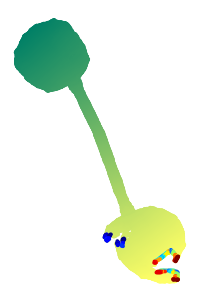

###############
Took 7.2 seconds to compute initial global embedding.
###############

Refining parameters and computing final global embedding...
Using GPA...
Iteration: 0
error: 0.00031722292728510307


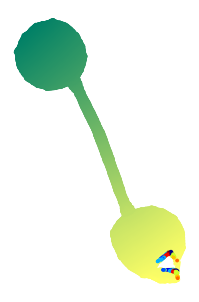

Iteration: 1
error: 0.00033512444859361463
Iteration: 2
error: 0.0003355775504283244
Iteration: 3
error: 0.00033122268090823674
Iteration: 4
error: 0.00032449459672298167
Iteration: 5
error: 0.00032213302564202236


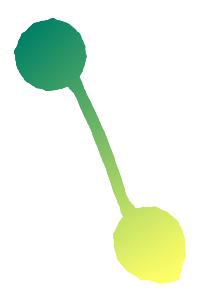

Iteration: 6
error: 0.00031685626046545396
Iteration: 7
error: 0.00031196277264745843
Iteration: 8
error: 0.00030753153148722467
Iteration: 9
error: 0.0003037680397412383
Iteration: 10
error: 0.00030041541454813736


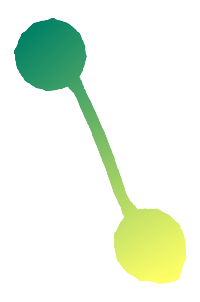

Iteration: 11
error: 0.00029763004665929785
Iteration: 12
error: 0.00029495493001863474
Iteration: 13
error: 0.000292772866717578
Iteration: 14
error: 0.0002906294259654977
Iteration: 15
error: 0.0002889286071682446


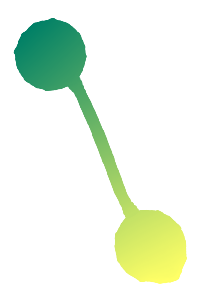

Iteration: 16
error: 0.0002872755399462748
Iteration: 17
error: 0.00028588824340203283
Iteration: 18
error: 0.0002845174178823094
Iteration: 19
error: 0.00028331600264168096


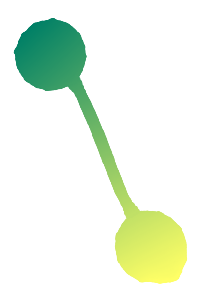

###############
Took 328.7 seconds to refine global embedding.
###############
###############
Took 337.5 seconds to perform step 3: compute global embedding.
###############


In [6]:
%matplotlib inline
ldle_obj.fit()

# Optionally save for further visualizations using Visualization.ipynb

In [7]:
save_path = save_dir_root+'/ldle_obj.dat'
with open(save_path, "wb") as f:
    pickle.dump([X, labelsMat, ldle_obj], f)

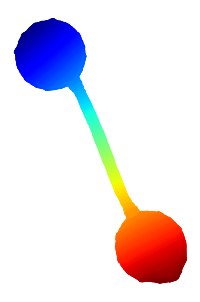

In [8]:
%matplotlib inline
ldle_obj.vis.global_embedding(ldle_obj.y_final, labelsMat[:,0], 'jet', title='LDLE0')

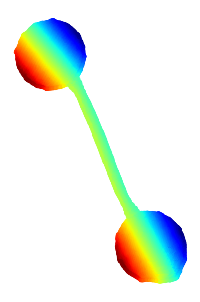

In [9]:
%matplotlib inline
ldle_obj.vis.global_embedding(ldle_obj.y_final, labelsMat[:,1], 'jet', title='LDLE1')

# LTSA

In [10]:
from matplotlib import pyplot as plt
from sklearn.manifold import LocallyLinearEmbedding
import visualize
vis = visualize.Visualize(save_dir_root)

5


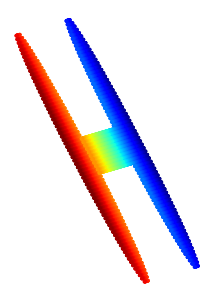

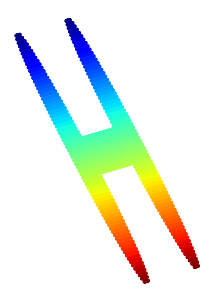

10


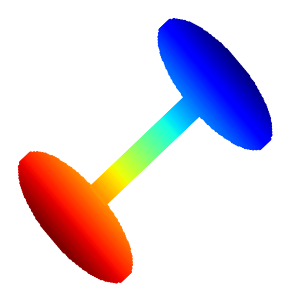

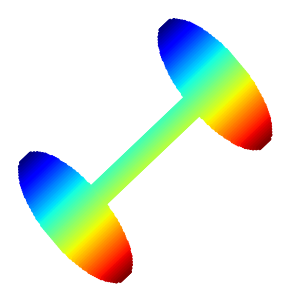

25


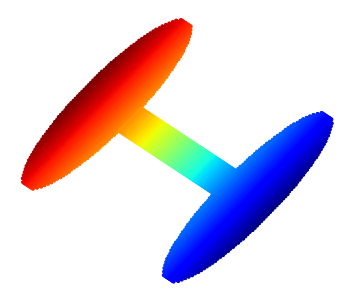

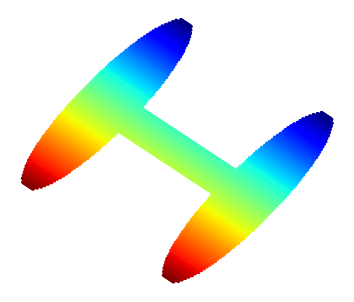

15


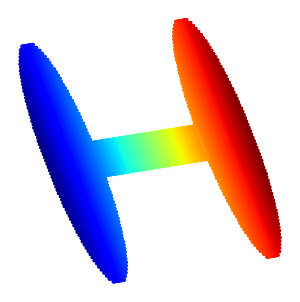

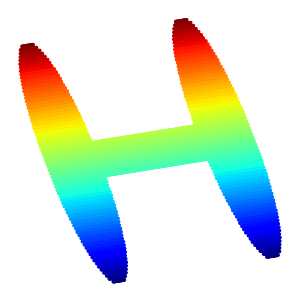

75


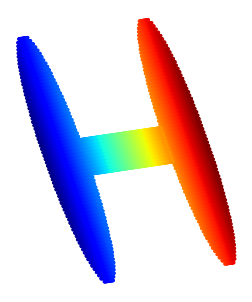

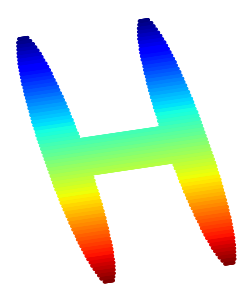

100


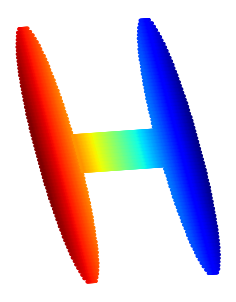

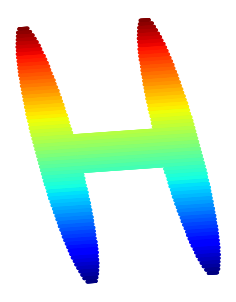

In [11]:
for n_neighbors in [5,10,25,15,75,100]:
    print(n_neighbors)
    ltsa_obj = LocallyLinearEmbedding(method='ltsa', n_neighbors=n_neighbors,
                                      n_components=2, n_jobs=-1, random_state=42)
    y_ltsa = ltsa_obj.fit_transform(X)
    vis.global_embedding(y_ltsa, labelsMat[:,0], 'jet', title='LTSA0_'+str(n_neighbors))
    plt.show()
    vis.global_embedding(y_ltsa, labelsMat[:,1], 'jet', title='LTSA1_'+str(n_neighbors))
    plt.show()

# UMAP

In [12]:
from umap import UMAP
import visualize
vis = visualize.Visualize(save_dir_root)

25 0.01


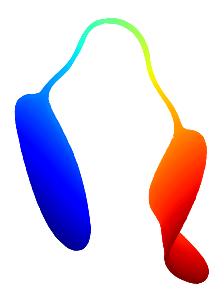

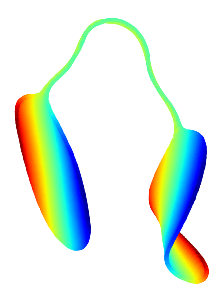

25 0.1


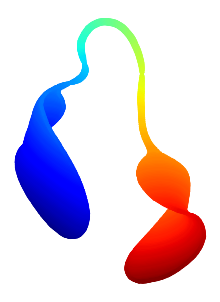

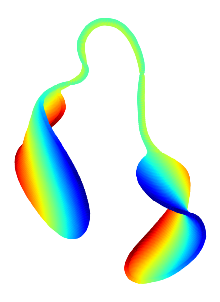

25 0.25


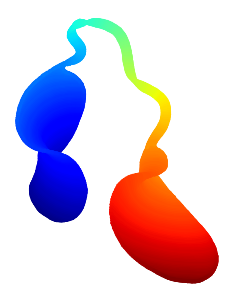

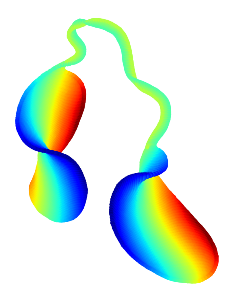

25 0.5


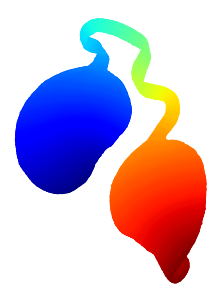

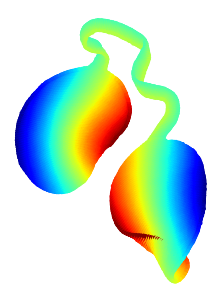

50 0.01


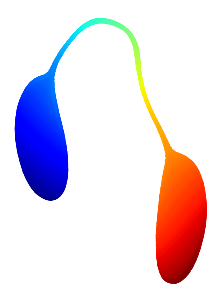

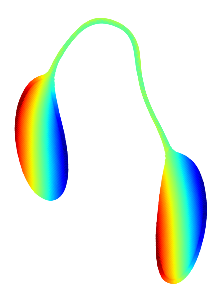

50 0.1


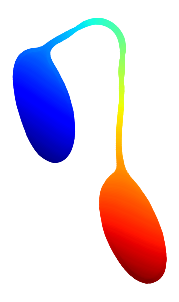

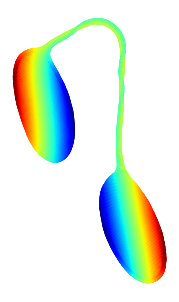

50 0.25


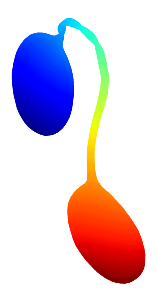

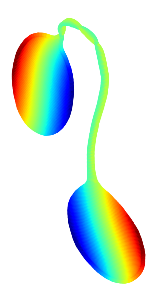

50 0.5


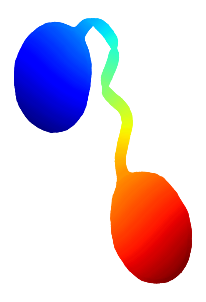

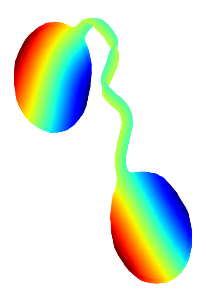

100 0.01


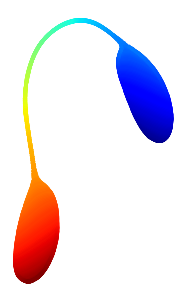

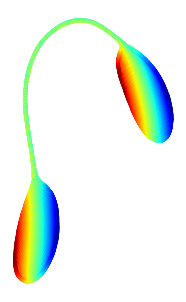

100 0.1


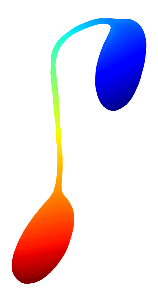

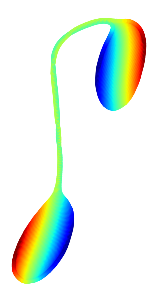

100 0.25


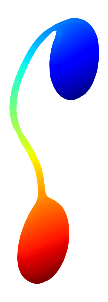

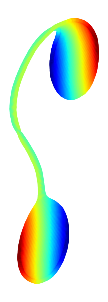

100 0.5


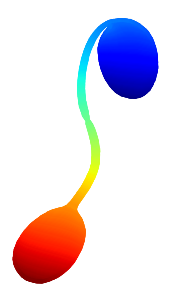

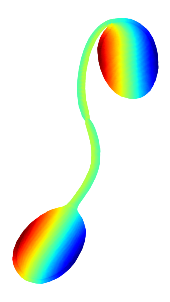

200 0.01


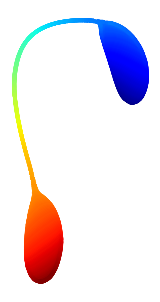

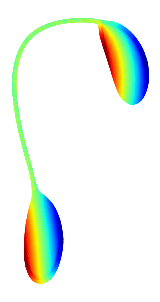

200 0.1


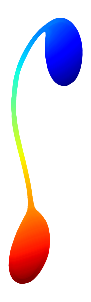

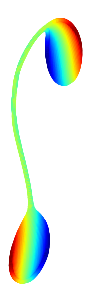

200 0.25


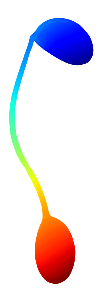

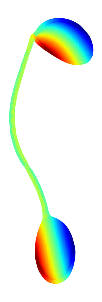

200 0.5


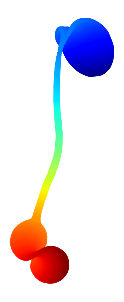

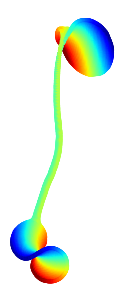

In [13]:
for n_neighbors in [25,50,100,200]:
    for min_dist in [0.01,0.1,0.25,0.5]:
        print(n_neighbors, min_dist)
        umap_obj = UMAP(n_neighbors=n_neighbors, min_dist=min_dist, n_components=2,
                        random_state=42, n_epochs=500, metric='euclidean')
        y_umap = umap_obj.fit_transform(X)
        vis.global_embedding(y_umap, labelsMat[:,0], 'jet', title='UMAP0_'+str(n_neighbors)+'_'+str(min_dist))
        plt.show()
        vis.global_embedding(y_umap, labelsMat[:,1], 'jet', title='UMAP1_'+str(n_neighbors)+'_'+str(min_dist))
        plt.show()

# t-SNE

In [14]:
from sklearn.manifold import TSNE
import visualize
vis = visualize.Visualize(save_dir_root)

30 2


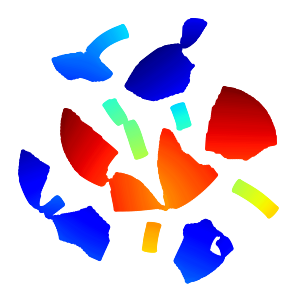

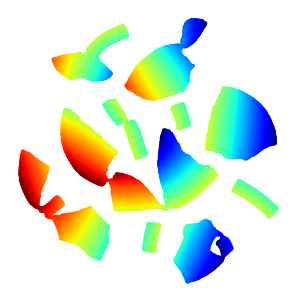

30 4


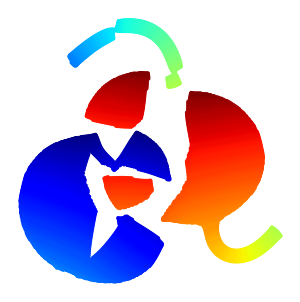

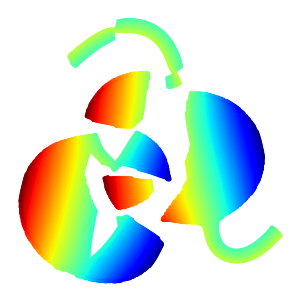

30 6


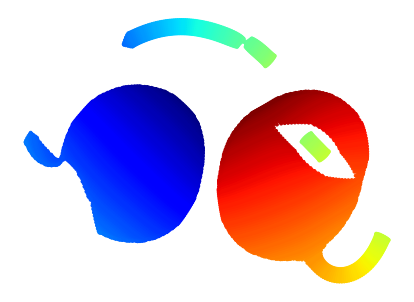

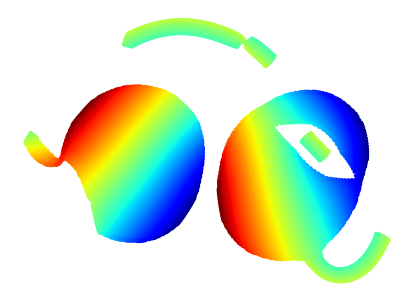

40 2


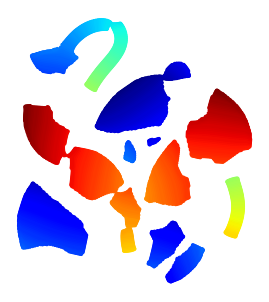

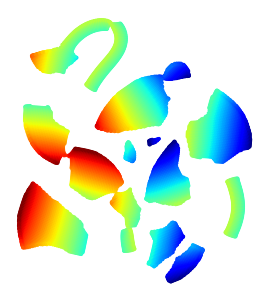

40 4


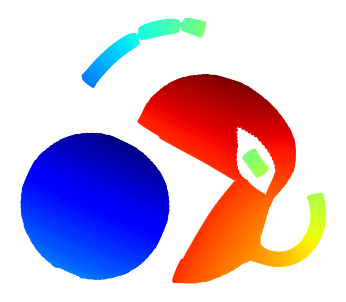

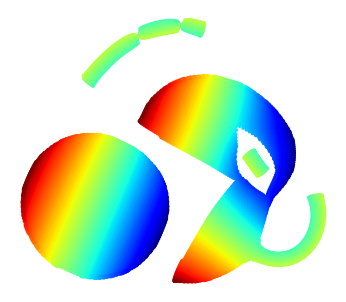

40 6


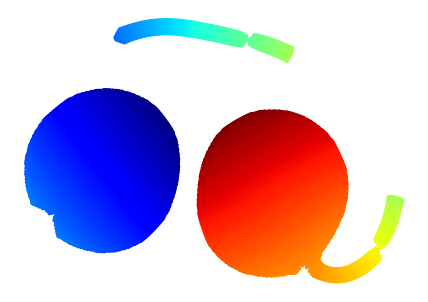

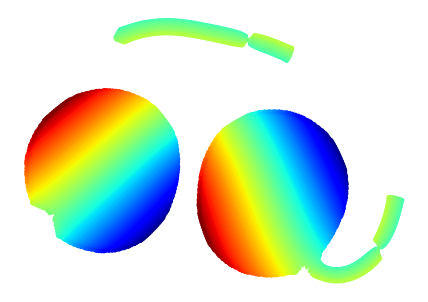

50 2


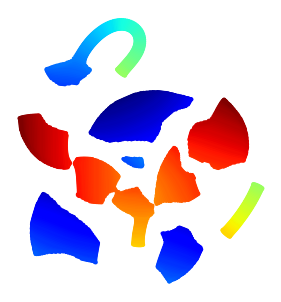

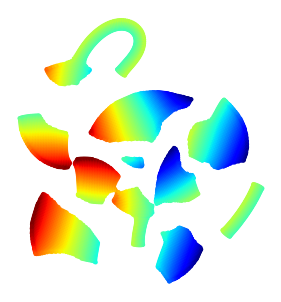

50 4


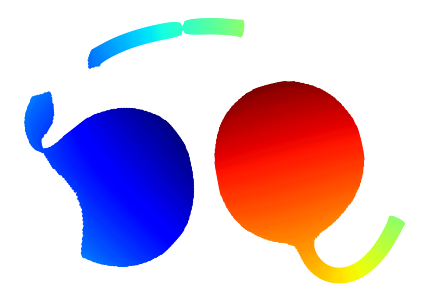

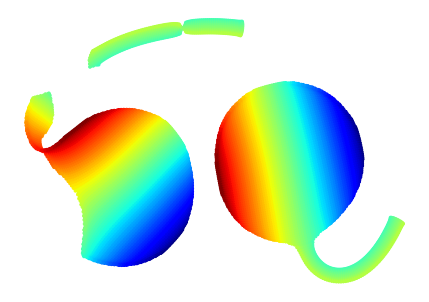

50 6


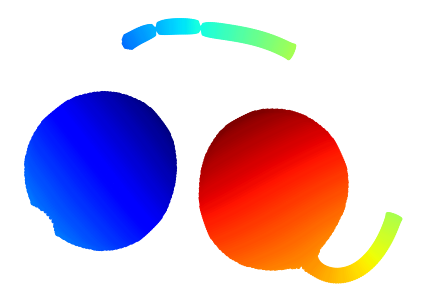

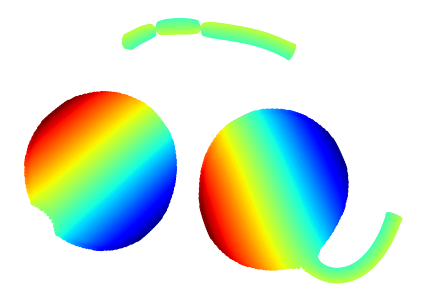

60 2


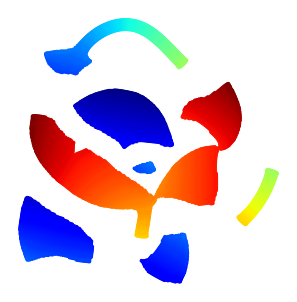

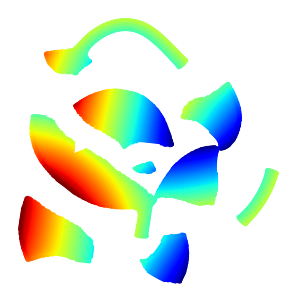

60 4


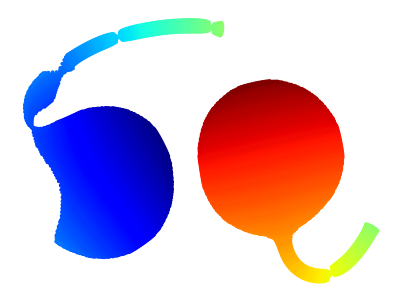

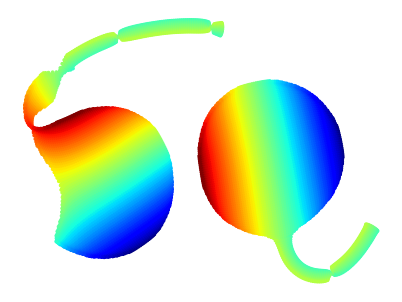

60 6


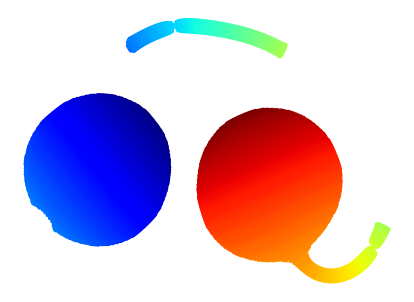

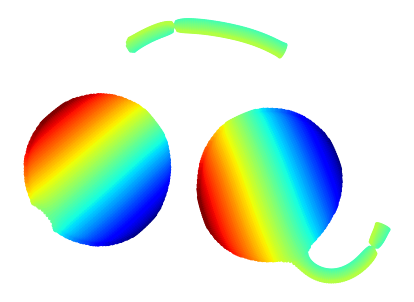

In [15]:
for perplexity in [30,40,50,60]:
    for ee in [2,4,6]:
        print(perplexity, ee)
        tsne_obj = TSNE(perplexity=perplexity, early_exaggeration=ee, n_components=2,
                        metric='euclidean', random_state=42, n_iter=1000,
                        n_jobs=-1, init='random')
        y_tsne = tsne_obj.fit_transform(X)
        vis.global_embedding(y_tsne, labelsMat[:,0], 'jet', title='t-SNE0_'+str(perplexity)+'_'+str(ee))
        plt.show()
        vis.global_embedding(y_tsne, labelsMat[:,1], 'jet', title='t-SNE1_'+str(perplexity)+'_'+str(ee))
        plt.show()